<a id='top'></a>

# Lecture 3: Conditioning & Stability

<div style="background-color: #ffe0b2; padding: 10px; border-left: 5px solid #ff9800;">
    <strong>Note:</strong> 
This lecture is based on Chapter 1 of [Fundamentals of Numerical Computation by Driscoll, Braun] which is avaliable <a href="https://fncbook.com/overview/">online</a> 
</div>

<div style="background-color: #ffe0b2; padding: 10px; border-left: 5px solid #ff9800;">
    <strong>Note:</strong> 
These notes contain some (but not all) of the content of the lecture. Please let me know if there are any additions that you feel are particularly important and let me know if you find any errors. 
</div>

- Review of monday: floating point numbers, round off error
- Conditioning 
- Stability 
- Extra reading
  - [myths of polynomial interpolation](https://people.maths.ox.ac.uk/trefethen/mythspaper.pdf)

<div class='alert alert-block alert-danger'><b>⚠ Subtractive cancellation</b> 

When adding or subtracting numbers so that the result is much smaller in magnitude. For example, we know $x = -1.0000000000000000000147$ to $23$ significant digits but $x + 1 = -1.47 \times 10^{-20}$ to only $3$ significant digits. </div> 

This concept can be illustrated using (relative) condition number: suppose we are interested in a quantity $f(x)$ for $x\in \mathbb R$. In practice, we can only store $\widetilde{x} := \mathrm{fl}(x)$ in a computer (recall that $\widetilde{x} = x(1 + \epsilon)$ for some $|\epsilon|\leq \frac12 \epsilon_{\mathrm{mach}}$). Then the ratio of the relative error in the output to the relative error in the input in the limit as the precision goes to zero is known as the *(relative) condition number* $\kappa_f(x)$: 

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition (relative condition number).</strong>  

\begin{align}
\kappa_f(x) := \lim_{\epsilon\to0}\left|
    \frac
        {f(x) - f(x + \epsilon x)}
        {\epsilon f(x)}
    \right| \nonumber
    %
\end{align}

</div> 

That is, the (relative) condition number is approximately the constant of proportionality between the relative error in the output and the relative error of the input:


\begin{align}
    \left|\frac
        {f(x) - f(\widetilde{x})}
        {f(x)} \right|
    \approx \kappa_f(x) |\epsilon|. \nonumber
\end{align}

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example.</strong> 

The condition number of $f(x) = x + 1$ is $\kappa_f(x) = \left|\frac{x}{x+1}\right|$. This blows up when $x\approx -1$ which explains subtractive cancellation that we mentioned above.
 </div> 

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition.</strong> 

If the condition number is large, we say the problem is *ill-conditioned* or the problem is badly conditioned </div> 

Notice that 

\begin{align}
    \kappa_f(x) &= \lim_{\epsilon\to0}\left|
    \frac
        {f(x) - f(x + \epsilon x)}
        {\epsilon f(x)}
    \right| \nonumber\\
    %
    &= \lim_{\epsilon\to0}\left|
    \frac
        {f(x) - f(x + \epsilon x)}
        {\epsilon x}
    \right|
    \left| \frac{x}{f(x)} \right| \nonumber\\
    %
    &= \left| \frac{x f'(x)}{f(x)} \right|
\end{align}

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Examples.</strong> 

Suppose
\begin{align}
    f_1(x) = cx, \qquad f_2(x) = \log(x), \qquad f_3(x) = e^x, \qquad f_4(x) = x^p 
\end{align}

What is $\kappa_{f_j}(x)$ for $j=1,2,3,4$?
 </div> 

## Polynomial roots as a function of monomial basis coefficients

The polynomial 

\begin{align}
    a \xi^2 + b \xi + c = 0
\end{align}

has roots $\xi_1,\xi_2$. Fix $b,c$ and consider $\xi_1 = \xi_1(a)$. What is $\kappa_{\xi_1}(a)$?

<div class='alert alert-block alert-danger'><b>⚠ Warning.</b> 

Polynomials are only badly conditioned with respect to the monomial basis $\{ x^j \}_{j=0,1,2,...}$. Computing with e.g. Chebyshev polynomials $\{T_j(x)\}_j$ instead is well conditioned. This is a potential topic for a presentation next term! e.g. understand and explain [this](https://www.chebfun.org/examples/linalg/CondNos.html), [this](https://www.chebfun.org/examples/linalg/CondVandermonde.html), ....
</div> 

Poor conditioning is a problem with the problem! On the other hand, if we see a large error in the result, the problem might be with the solution! That is, the algorithm can also introduce errors. When the error can not be explained by an ill-conditioned problem, we will say the algorithm is *unstable*.

## <span id='arithmetic'>Stability: An Example</span>

Consider $\xi^2 - (10^n + 10^{-n})\xi + 1 = 0$. The roots of this equation are $\xi_1 := 10^{-n}$ and $\xi_2 := 10^n$. These roots are well separated so we expect the problem of finding the roots to be well-conditioned. We show below that the quadratic formula is ***unstable***.  

The quadratic formula in floating point arithmetic gives:

In [1]:
n = 8;
a, b, c = 1, -(10.0^n + 10.0^(-n)), 1;
ξ1, ξ2 = ( -b - sqrt( b^2 - 4*a*c) )/(2*a), ( -b + sqrt( b^2 - 4*a*c) )/(2*a);

@show ( ξ1, ξ2 ) ;

(ξ1, ξ2) = (1.4901161193847656e-8, 1.0e8)


The error in approximating the first root is quite big!

In [2]:
println( "relative errors = (", abs( ξ1 - 10.0^(-n) )/10.0^(-n) , ", ", abs( ξ2 - 10.0^n )/10.0^n, ")" )

relative errors = (0.49011611938476557, 0.0)


But why?

In [3]:
-b

1.0000000000000001e8

In [4]:
sqrt( b^2 - 4 * a * c )

9.999999999999999e7

In [5]:
-b - sqrt( b^2 - 4*a*c)

2.9802322387695312e-8

The function $f(x) = x -\sqrt{ b^2 - 4ac }$ has condition number $\kappa = \kappa_f(-b)$ given by

In [6]:
κ = abs( b*1 / ( -b - sqrt(b^2 - 4*a*c) ) )

3.3554432000000005e15

This condition number is large due to ***Subtractive Cancellation***! The quadratic formula is thus ill-conditioned. Alternatively we could compute $\xi_1$ from $\xi_2$:

In [7]:
ξ1 = (c/a)/ξ2

1.0e-8

Which is exact in ``Float64``.  

Another way of computing $\xi_1$ is to ***rationalise the numerator***:

\begin{align}
    \xi_1 
    &= \frac{ -b - \sqrt{ b^2 - 4ac } }{2a} \\
    %
    &= \frac{ -b - \sqrt{ b^2 - 4ac } }{2a}
    \times \frac{ -b + \sqrt{ b^2 - 4ac } }{-b + \sqrt{ b^2 - 4ac } } \nonumber\\
    %
    &= \frac
        { b^2 - ( b^2 - 4ac ) }
        {2a( -b + \sqrt{ b^2 - 4ac } )} \\
    %
    &= \frac
        { 2c }
        { -b + \sqrt{ b^2 - 4ac } }
\end{align}

Using this formula, we get

In [8]:
ξ1 = 2*c / ( -b + sqrt(b^2 - 4*a*c) )

1.0e-8

Which is again exact in ``Float64``

## FNC Exercises

### 1.4.1. 

\begin{align}
    f(x) = \frac{1-\cos x}{\sin x}, \qquad g(x) = \frac{2 \sin^2 \frac{x}{2}}{\sin x}
\end{align}

(i) Notice mathematically $f = g$ (double angle formula),  
(ii) What is $\kappa_f(x)$ for small $|x|$?    
(iii) What is $f(10^{-6})$? $g(10^{-6})$?  
(iv) Which is more accurate?  
(v) Compute the condition numbers of the individual steps

Hint: Calculate the condition numbers for the intermediate steps. For $f$, you need the functions $x \mapsto \cos x, \sin x, 1 - x, \frac{1}{x}$ and to compute $g$, you need $x\mapsto x/2, \sin(x), x^2, 2x, \frac{1}{x}$.

In [9]:
f = x -> (1 - cos(x) )/sin(x)
g = x -> 2*sin(x/2)^2/sin(x)

(f(1e-6), g(1e-6))

(5.000444502912538e-7, 5.000000000000416e-7)

### 1.4.2

\begin{align}
    f(x) = \frac{e^x-1}{x}, \qquad p(x) = 1 + \frac1{2!} x + \frac1{3!} x^2 + \dots + \frac{1}{9!} x^8 
\end{align}

(i) What is $\kappa_f(x)$?   
(ii) Compute $f$ at $10^{-n}$ for $n=1,2,3,...$,     
(iii) Notice that $p$ is a Taylor polynomial of $f$ about $0$,     
(iv) Compute $p(x)$ at $10^{-n}$ for $n=1,2,3,...$,  
(v) Compare these values to the values of $f$. Which ones are more likely to be accurate?   

In [10]:
x = @. 10.0^(-(1:11));

f = @. (exp(x) - 1)/x;

p=1;
for n in 1:8
    p = @. p + x^n/( factorial(n+1) );
end 

abs.(f-p) ./ x

11-element Vector{Float64}:
    1.1102230246251565e-14
    1.0658141036401503e-12
    4.285460875053104e-11
    4.32542890393961e-9
    9.701794922989393e-7
    3.798317216308078e-5
    0.005663214341922185
    1.1077470940534795
   82.24037095772019
  826.9037099495335
 8273.537099867668

In [ ]:
# upper bound on the error between f and p as functions on x
err = @. (1/factorial(10)) * (x^9/(1-x))

11-element Vector{Float64}:
 3.061924358220656e-16
 2.7835675983824133e-25
 2.758490412811401e-34
 2.7560075231509052e-43
 2.755759479993391e-52
 2.755734678133266e-61
 2.7557321979718073e-70
 2.755731949955909e-79
 2.755731925154322e-88
 2.7557319226741635e-97
 2.755731922426145e-106

## Chapter 2. Solving nonlinear equations in 1d

<div style='background-color: #ffe0b2; padding: 10px; border-left: 5px solid #ff9800;'><strong>Note.</strong>  This chapter will be mainly based on Chapter 1 of An Introduction to Numerical Analysis by Suli, Mayers. These notes are mainly a record of what we discussed and are not a substitute for attending the lectures and reading books! If anything is unclear/wrong, let me know and I will update the notes.
 </div> 

* Simple functions can be solved explicitly $ax^2 + bx + c = 0$ (also true for degree $3,4$)  
* $x^5 - 4x - 2 = 0$ - no closed formula for roots of this equation

In [12]:
using Polynomials  
using Plots
using LaTeXStrings

p = Polynomial(-2 - 4*x + x^5)


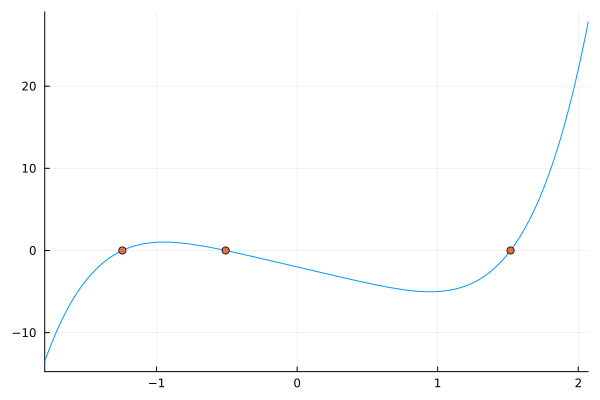

In [13]:
p = Polynomial([-2, -4, 0, 0, 0, 1]) 
@show p;
plot(p, legend=false)

plot!( real( filter( isreal, roots(p) ) ), zeros(3), seriestype=:scatter )

* Need numerical methods to get the roots!
* Aim: for $f: [a,b] \to \mathbb R$, solve $f(\xi) = 0$ for $\xi \in \mathbb R$, 
* Also, can find $\xi$ such that $f(\xi) = c$ (by considering $x \mapsto f(x) - c$) or stationary points (by considering $f = F'$),
* Simple examples with no solution, e.g. $f(x) = x^2 + 1$
* Change of sign theorem: if $f$ is continuous on $[a,b]$ and $f(a) f(b) \leq 0$ then there exists $\xi \in [a,b]$ with $f(\xi) = 0$. Proof: apply intermediate value theorem.

<div class='alert alert-block alert-danger'><b>Remark.</b> 

The converse to this theorem is untrue. i.e. there exists $f$ with a real root in $[a,b]$ but with $f(a)f(b) > 0$. </div> 

* Rewrite as a fixed point problem $g(x) = x$ (for example, we could define $g(x) := x \pm f(x)$)
* Brouwer's fixed point theorem: Suppose $g : [a,b]\to\mathbb R$ is continuous with $g(x) \in [a,b]$ for all $x \in [a,b]$. Then, there exists $\xi\in [a,b]$ with $g(\xi) = \xi$. Proof: apply change of sign theorem to $f(x) := g(x) - x$.

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example.</strong> 

Let $f(x) = e^x - 2x - 1$. Apply change of sign theorem to $f$ to conclude there exists $\xi \in [1,2]$ such that $f(\xi) = 0$.
</div> 

(f(1), f(2)) = (-0.2817181715409549, 2.3890560989306504)


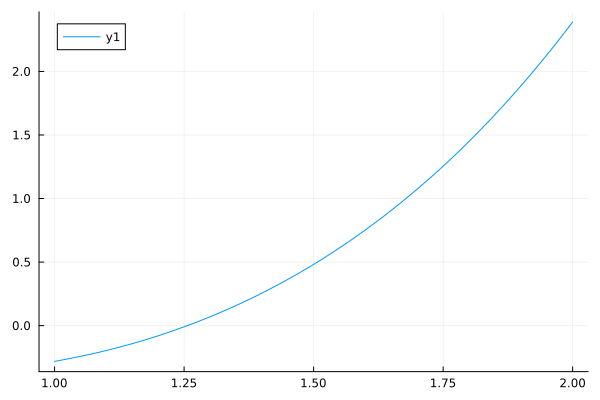

In [21]:
f = x -> exp(x) - 2*x - 1;
@show ( f(1), f(2) )

plot( f, 1,2)

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'>

We could solve $f(x) = 0$ by instead considering the fixed point problems $g(x) = x$ or $h(x) = x$ where

\begin{align}
    g(x) = \log( 2x + 1 ), \quad  \text{and} \quad h(x) = \frac{e^x - 1}{2}
\end{align}

Brouwer's fixed point theorem applies to $g$ but **not** $h$ on $[1,2]$:
</div> 

(g(1), g(2)) = (1.0986122886681098, 1.6094379124341003)
(h(1), h(2)) = (0.8591409142295225, 3.194528049465325)


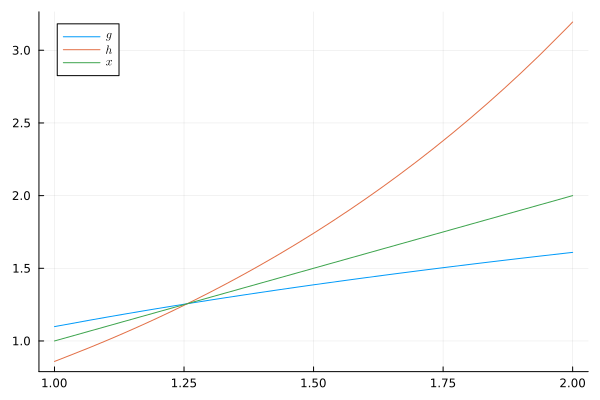

In [15]:
g = x -> log( 2*x + 1 );    
h = x -> (exp(x) - 1)/2;
id = x -> x;

@show (g(1), g(2));
@show (h(1), h(2));

plot( [g, h, id], 1, 2, label=[L"g" L"h" L"x"])

* Consider iterative methods of the form $x_{n+1} := g(x_n)$ for some $x_1 \in [a,b]$
* Lemma: if $(x_{n}) \to \xi$ then $\xi$ is a fixed point of $g$. Proof: Use the fact that $x_{n+1}\to \xi$ and $g$ is continuous so $g(x_n)\to g(\xi)$.

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example (cont.).</strong> 

Returning to $f(x) = e^x - 2x - 1$, do the iterative methods $x_{n+1} = g(x_n)$ and $y_{n+1} = h(y_n)$ converge for $x_1 = y_1 = 1$?

 </div> 

(x[15], y[15]) = (1.2563147213300918, 0.0004396618681772324)


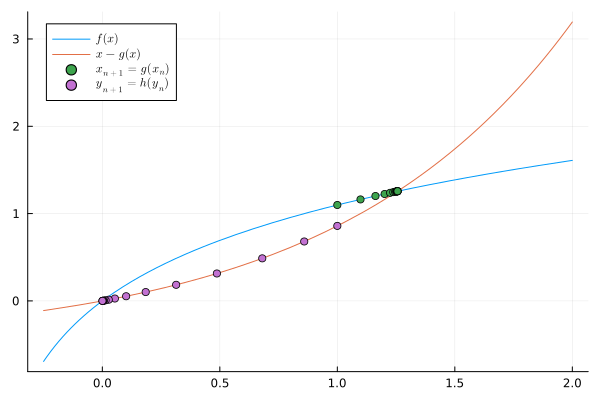

In [16]:
x, y = zeros( 15 ), zeros( 15 );
x[1] = 1; y[1] = 1;
for n in 1:14
    x[n+1] = g(x[n]);
    y[n+1] = h(y[n]);
end
@show (x[15], y[15]);

plot( [g, h] , -0.25, 2, label=[ L"f(x)" L"x - g(x)" L"x - h(x)"])
plot!( x, g.(x), seriestype=:scatter, label=L"x_{n+1} = g(x_n)" )
plot!( y, h.(y), seriestype=:scatter, label=L"y_{n+1} = h(y_n)" )

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'>

Here, we see that $x_n \to \xi \approx 1.26 \in [1,2]$ but $y_{n} \to \widetilde{\xi} \approx 0$ so the formulations $g(x) = x$ and $h(x) = x$ are equivalent, but they lead to different numerical methods.
 </div> 

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition.</strong> 

Let $x_n \to \xi$. Suppose that there exist $\alpha\geq1$ and $\mu \geq 0$ such that

\begin{align}
    \lim_{n\to\infty}  \frac{\left|x_{n+1} - \xi\right|}{\left|x_n - \xi\right|^\alpha} = \mu
\end{align}

* If $\alpha = 1$ and $\mu \in (0,1)$, we say the convergence is *linear*,
* If $\alpha = 1$ but $\mu = 0$, we say the convergence is *superlinear* (i.e. faster than linear),
* If $\alpha = 1$ and $\mu = 1$, we say the convergence is *sublinear* (i.e slower than linear),
* If $\alpha = 2$, we say the convergence is *quadratic*,...

In the case where *(i)* $\alpha = 1, \mu \in (0,1)$ or *(ii)* $\alpha>1, \mu> 0$, we say
* $x_n \to \xi$ with *order* $\alpha$, 
* $\mu$ is the *asymptotic error constant*, and
* $\rho := - \log_{10} \mu$ is the *asymptotic rate of convergence*.

 </div> 

* Define the errors $e_n \coloneqq |x_{n}-\xi|$. Then, we have $e_{n+1} \approx \mu e_{n}^\alpha$,
* For linear convergence, $e_{n+N} \approx \mu^n e_N = 10^{-\rho n} e_N$ and so $\rho$ measures the number of decimal digits of accuracy gained in one iteration (for sufficiently large $N$)

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example (cont.).</strong> 

Let's go back to our example: $f(x) = e^x - 2x - 1$. We have defined $g(x) = \log( 2x + 1 )$ and we are trying to solve the fixed point problem $g(x) = x$ (which is mathematically equivalent to $f(x) = 0$).

We have seen (numerically) that $x_{n+1} = g(x_n)$ with $x_1$ converges to $\xi = g(\xi) \approx 1.26$. What is the order of convergence? What is the asymptotic error constant? Asymptotic rate of convergence?
</div> 

In [17]:
ξ = 1; 
for n in 1:100
    ξ = g(ξ)
end 

# this is e_{n+1}/e_{n} for n=1,...,14
μn = @. abs( ( x[2:15] - ξ )/(x[1:14] - ξ ))
μ, ρ = μn[14], -log10( μn[14] );

μn

14-element Vector{Float64}:
 0.6154434977067526
 0.5965577179668249
 0.5851632047756364
 0.5784563522754123
 0.5745645700825062
 0.5723246633711306
 0.5710414920687147
 0.5703083577906018
 0.5698901195281622
 0.569651729099643
 0.569515916456726
 0.5694385647462568
 0.5693945163234355
 0.569369434946979

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'>

This quantity appears to converge to $\mu \in (0,1)$. Therefore, we have $x_n \to \xi$ linearly with asymptotic error constant $\mu$ and asymptotic rate of convergence $\rho$ where these constants are as follows:

</div> 

In [18]:
@show (ξ, μ, ρ);

(ξ, μ, ρ) = (1.2564312086261695, 0.569369434946979, 0.24460585048403266)


<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'>

Next time, we will prove (mathematically) that $x_{n+1} = g(x_n)$ converges linearly and show that $\mu = |g'(\xi)|$. Our computed value of $\mu$ (after $15$ iterations) is close to this theoretical value: 

</div>    

In [ ]:
der_g = x -> 2/( 2*x + 1);
@show der_g( ξ )
@show μ;

# relative error:
abs(( der_g( ξ ) - μ ) / der_g( ξ ) )

der_g(ξ) = 0.569336274081677
μ = 0.569369434946979


5.824477872153201e-5